### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [11]:
data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

## Missing Data:
The fields that had missing the values were the following:

- car                                       12576
- CoffeeHouse                       217
- Restaurant20To50              189
- CarryAway                           151
- RestaurantLessThan20      130
- Bar                                        107

To better understand what to do with the rows with missing data, I needed to better understand what those columns represented, so I looked at the value distribution across any of those columns.

In [13]:
for column in data.columns.to_list():
  print(f"Column is: {column}\n")
  print(data[column].value_counts())
  print(f"This column has this many null rows: {data[column].isnull().sum()}")
  print(".........................")
  print(".........................")


Column is: destination

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
This column has this many null rows: 0
.........................
.........................
Column is: passanger

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
This column has this many null rows: 0
.........................
.........................
Column is: weather

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
This column has this many null rows: 0
.........................
.........................
Column is: temperature

80    6528
55    3840
30    2316
Name: temperature, dtype: int64
This column has this many null rows: 0
.........................
.........................
Column is: time

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
This column has this many null rows: 0
.........................
.........................
Colu

3. Decide what to do about your missing data -- drop, replace, other...

## Data Cleaning:
For cars: the values were the following: 
- Scooter and motorcycle                     
- Mazda5                                      
- do not drive                                
- crossover
- Car that is too old to install Onstar :D

99% of the rows were missing that column. The data that was included was not usable, so I decided to eliminate that column from the data set instead of eliminating the rows. If all the data was present, I probably would’ve had to categorize the cars instead of using the raw values present in the data set.


In [16]:
data = data.drop("car", axis=1)


## Data Cleaning
**CoffeeHouse**, **CarryAway**, **Bar**, **Restaurant20To50** and **RestaurantLessThan20**, they all indicate the number of times those establishments are frequented (I’ll refer to those columns as the **“establishment”** columns). 
The **coupon** field indicates the type of establishment the coupon applies to. 

There's two ways to think about this:
1. It’s okay to have a null **“establishment”** column as long as the **coupon** type was not the same. This approach assumes that the rest of the **"establishment"** columns are independent of each other.
2. If we wanted to analyze any correlation between establishment columns, then we can't have any null values to draw  conclusions on that correlation


In [19]:
query = "(CoffeeHouse.isnull() & coupon == 'Coffee House')"
query = f"{query} | (CarryAway.isnull() & coupon == 'Carry out & Take away')"
query = f"{query} | (Bar.isnull() & coupon == 'Bar')"
query = f"{query} | (Restaurant20To50.isnull() & coupon == 'Restaurant(20-50)')"
query = f"{query} | (RestaurantLessThan20.isnull() & coupon == 'Restaurant(<20)')"

df_need_to_purge = data.query(query)
missing_establishment_for_coupon = df_need_to_purge.shape[0]
if ( missing_establishment_for_coupon == 0):
    print("There are no rows with blank establishment type respective to its coupon type")
else:
    print(f"There are {missing_establishment_for_coupon} rows with blank establishment type for the same coupon type")

There are 164 rows with blank establishment type for the same coupon type


## Data Cleaning 2

Since we found that there are rows with a blank establishment type that correspond to the coupon type, and more importantly since we cannot confirm that establishment types are independent, we decided to purge all rows with null data. 

In [28]:
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [31]:
total_observations = data.shape[0]
# 'data['Y'].value_counts()[1]' counts the number of times the 'Y' columns was set to 1 (i.e. accepted)
accepted_coupon = data['Y'].value_counts()[1]

ans_to_q4 = accepted_coupon/total_observations
print(round(ans_to_q4,2))

0.57


<AxesSubplot:xlabel='Y', ylabel='Count'>

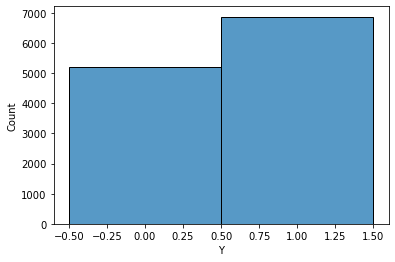

In [170]:
sns.histplot(data, x="Y",  discrete=True)


**Answer: 57% of total observations chose to accept the coupons**

5. Use a bar plot to visualize the `coupon` column.

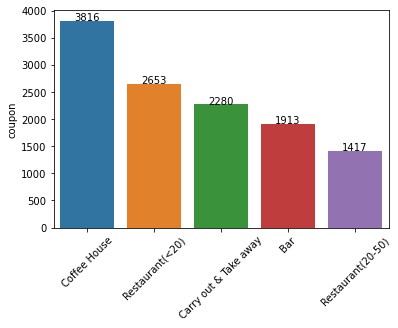

In [168]:
ax = sns.barplot(data=data, x=data.coupon.value_counts().index, y=data.coupon.value_counts())
plt.xticks(rotation=45)
for i, v in enumerate(data.coupon.value_counts()):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.show()



6. Use a histogram to visualize the temperature column.

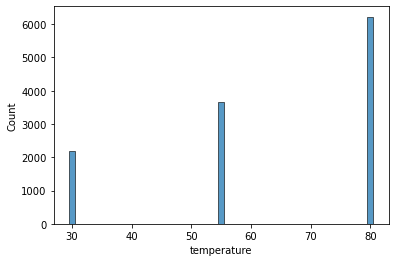

In [190]:
ax = sns.histplot(data=data, bins=3, x='temperature', discrete=True)



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
df_cpn = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [48]:
total_bar_coupons = df_cpn.shape[0]
accepted = df_cpn['Y'].value_counts()[1]
print(f'Total Bar coupons: {total_bar_coupons}')
print(f'Total accepted coupons: {accepted}')
print(f'Proportion who accepted the coupon: {round(accepted/total_bar_coupons,2)}')

Total Bar coupons: 1913
Total accepted coupons: 788
Proportion who accepted the coupon: 0.41


**ANSWER: 41% of Bar Coupons were accepted**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [52]:
three_or_fewer = ['never', 'less1', '1~3']

total_3_or_fewer =df_cpn.query("Bar in @three_or_fewer")['Y'].count()
accepted_3_or_fewer = df_cpn.query("Bar in @three_or_fewer")['Y'].value_counts()[1]
print(f'Total who had Bar coupons and and went to the bar 3 or fewer time is: {total_3_or_fewer}')
print(f'Out of those, there are {accepted_3_or_fewer} who accepted the coupon\n')
      
accepted_ratio_3_or_fewer = accepted_3_or_fewer / total_3_or_fewer
print(f'**The acceptance ratio of those who went to a bar 3 or fewer times per month is: {100*round(accepted_ratio_3_or_fewer,2)}%\n')

total_more_than_3 =df_cpn.query("Bar not in @three_or_fewer")['Y'].count()
accepted_more_than_3 = df_cpn.query("Bar not in @three_or_fewer")['Y'].value_counts()[1]

print(f'Total who had Bar coupons and and went to the bar more than 3 times is: {total_more_than_3}')
print(f'Out of those, there are {accepted_more_than_3} who accepted the coupon\n')

accepted_ratio_more_than_3 = accepted_more_than_3 / total_more_than_3
print(f'**The acceptance ratio of those who went to a bar more than 3 times per month is: {100*round(accepted_ratio_more_than_3,2)}%')


Total who had Bar coupons and and went to the bar 3 or fewer time is: 1720
Out of those, there are 641 who accepted the coupon

**The acceptance ratio of those who went to a bar 3 or fewer times per month is: 37.0%

Total who had Bar coupons and and went to the bar more than 3 times is: 193
Out of those, there are 147 who accepted the coupon

**The acceptance ratio of those who went to a bar more than 3 times per month is: 76.0%



- **The acceptance ratio of those who went to a bar 3 or fewer times per month is:37%**
- **The acceptance ratio of those who went to a bar more than 3 times per month is: 76%**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
less_than_1_per_month = ['never', 'less1']
age_gt_25 = ['26','31', '50plus', '36', '41', '46']     

criteria_1 = "Bar not in @less_than_1_per_month & age in @age_gt_25"
df_more_than_1_per_month_age_gt25 = df_cpn.query(criteria_1)
total_criteria_1 = df_more_than_1_per_month_age_gt25['Y'].count()
total_criteria_1_accepted = df_more_than_1_per_month_age_gt25['Y'].value_counts()[1]
ratio_criteria_1 = total_criteria_1_accepted / total_criteria_1

criteria_2 = "Bar in @less_than_1_per_month | age not in @age_gt_25"
df_less_than_1_per_month_OR_age_lt25 = df_cpn.query(criteria_2)
total_criteria_2 = df_less_than_1_per_month_OR_age_lt25['Y'].count()
total_criteria_2_accepted = df_less_than_1_per_month_OR_age_lt25['Y'].value_counts()[1]
ratio_criteria_2 =  total_criteria_2_accepted / total_criteria_2

print(f"The acceptance ratio of those who went to a bar more than once AND are over the age of 25: {100*round(ratio_criteria_1,2)}%")
print(f"The acceptance ratio of those who went to a bar less than once OR are NOT over the age of 25: {100*round(ratio_criteria_2,2)}%")

The acceptance ratio of those who went to a bar more than once AND are over the age of 25: 69.0%
The acceptance ratio of those who went to a bar less than once OR are NOT over the age of 25: 34.0%


- **The acceptance ratio of those who went to a bar more than once AND are over the age of 25: 69%**
- **The acceptance ratio of those who went to a bar less than once OR are NOT over the age of 25: 34%**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [60]:
excluded_occupation = ['Farming Fishing & Forestry']
excluded_passengers = ['Kid(s)']
df_criteria = df_cpn.query("Bar not in @less_than_1_per_month & passanger not in @excluded_passengers & occupation not in @excluded_occupation")

total_criteria = df_criteria['Y'].count()
total_criteria_accepted = df_criteria['Y'].value_counts()[1]
ratio_explicit_criteria = total_criteria_accepted / total_criteria
criteria_msg = "The drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry"
print(f'{criteria_msg} accepted the coupon at a rate of {100*round(ratio_explicit_criteria, 2)}%\n')

df_criteria_2 = df_cpn.query("Bar in @less_than_1_per_month | passanger in @excluded_passengers | occupation in @excluded_occupation")

total_criteria_2 = df_criteria_2['Y'].count()
total_criteria_accepted_2 = df_criteria_2['Y'].value_counts()[1]
ratio_explicit_criteria_2 = total_criteria_accepted_2 / total_criteria_2
print(f'All other drivers accepted the coupon at a rate of {100*round(ratio_explicit_criteria_2, 2)}%')


The drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted the coupon at a rate of 71.0%

All other drivers accepted the coupon at a rate of 30.0%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [63]:
age_lt_30 = ['21', '26', 'below21']
bar_lt_4 = ['never', 'less1', '1~3']
income_lt_50k = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
 
cheap_restaurants_gt_4 = ['4~8', 'gt8']


criteria_1 = "Bar not in @less_than_1_per_month & passanger not in @excluded_passengers & maritalStatus != 'Widowed'"
criteria_2 = "Bar not in @less_than_1_per_month & age  in @age_lt_30"
criteria_3 = "Bar in @bar_lt_4 & RestaurantLessThan20 in @cheap_restaurants_gt_4 & income in @income_lt_50k"

total_criteria_1 = df_cpn.query(criteria_1)['Y'].count()
total_criteria_1_accepted = df_cpn.query(criteria_1)['Y'].value_counts()[1]
ratio_criteria_1 = total_criteria_1_accepted / total_criteria_1

total_criteria_2 = df_cpn.query(criteria_2)['Y'].count()
total_criteria_2_accepted = df_cpn.query(criteria_2)['Y'].value_counts()[1]
ratio_criteria_2 = total_criteria_2_accepted / total_criteria_2

total_criteria_3 = df_cpn.query(criteria_3)['Y'].count()
total_criteria_3_accepted = df_cpn.query(criteria_3)['Y'].value_counts()[1]
ratio_criteria_3 = total_criteria_3_accepted / total_criteria_3

criteria_1_msg = "go to bars more than once a month, had passengers that were not a kid, and were not widowed"
criteria_2_msg = "go to bars more than once a month and are under the age of 30"
criteria_3_msg = "go to cheap restaurants more than 4 times a month and income is less than 50K"

print("Drivers who:\n")
print(f"* {criteria_1_msg} accept coupons at a rate of {100*round(ratio_criteria_1,2)}%")
print(f"* {criteria_2_msg} accept coupons at a rate of {100*round(ratio_criteria_2,2)}%")
print(f"* {criteria_3_msg} accept coupons at a rate of {100*round(ratio_criteria_3,2)}%")


Drivers who:

* go to bars more than once a month, had passengers that were not a kid, and were not widowed accept coupons at a rate of 71.0%
* go to bars more than once a month and are under the age of 30 accept coupons at a rate of 72.0%
* go to cheap restaurants more than 4 times a month and income is less than 50K accept coupons at a rate of 37.0%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In summary, there seems to be a correlation between factors like visit frequency, age, social status, occupation and the acceptance rate. Some of those factors are independent influencers in a positive way, some are independent in a negative way.
In other cases, a combination of factors is required to determine the probablity of acceptance. For example:

### Independent factors
- **Frequency of visit:** the more a driver visits a bar, the more likely they are to accept the coupon
- **Age and Occupation:** Younger drivers (less than 25) and occupation (farming, fishing, or forestry) are independently less likely to accept bar coupons
- **Passenger:** Drivers whith a child passenger are less likely to accept a coupon

### Combined factors
- **Frequency, passengers, and status**: Drivers who visit bars more than once a month, had passengers that were not a kid, and were not widowed are more likely to accept coupons
- **Economics**: Drivers that frequent cheap restaurants with an income below 50K/year are less likely to accept a bar Coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Establishment Selection

I'm analyzing the acceptance factors for **Coffee Houses** 

In [69]:
df_coffee = data.query("coupon == 'Coffee House'")


In [212]:
yesses = df_coffee['Y'].value_counts()[1]
nos = df_coffee['Y'].value_counts()[0]
total = df_coffee['Y'].count()

print(yesses, nos, total)
print(f"The ratio of those who accepted = {round(100*(yesses/total),2)}%")

1894 1922 3816
The ratio of those who accepted = 49.63%


<AxesSubplot:xlabel='CoffeeHouse', ylabel='Count'>

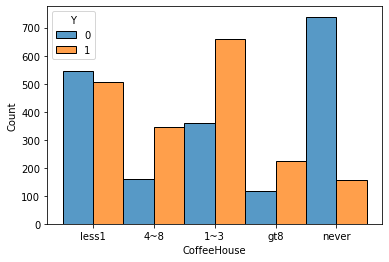

In [71]:
sns.histplot(df_coffee, x="CoffeeHouse", hue='Y', multiple="dodge")

In [219]:
criteria_less_frequent = ['less1', 'never']
criteria_more_frequent = ['4~8', 'gt8']

total_coffee_coupons = df_coffee['Y'].count()
accepted_coffee_coupons = df_coffee['Y'].value_counts()[1]
ratio_accepted_coupons = accepted_coffee_coupons / total_coffee_coupons
msg_coffee_coupons = "Those who frequented a Coffee House accepted coupons at a rate of: "


df_less_frequent = df_coffee.query("CoffeeHouse in @criteria_less_frequent")
df_more_frequent = df_coffee.query("CoffeeHouse in @criteria_more_frequent")

total_less_frequent = df_less_frequent['Y'].count()
accepted_less_frequent = df_less_frequent['Y'].value_counts()[1]
ratio_less_frequent = accepted_less_frequent / total_less_frequent
msg_less_frequent = "Those who frequented a Coffee House less than once a month accepted coupons at a rate of: "


total_more_frequent = df_more_frequent['Y'].count()
accepted_more_frequent = df_more_frequent['Y'].value_counts()[1]
ratio_more_frequent = accepted_more_frequent / total_more_frequent
msg_more_frequent = "Those who frequented a Coffee House one or more times per month accepted coupons at a rate of: "

print(f"{msg_coffee_coupons}{round(100*ratio_accepted_coupons,2)}%")
print(f"{msg_less_frequent}{round(100*ratio_less_frequent,2)}%")
print(f"{msg_more_frequent}{round(100*ratio_more_frequent,2)}%")



Those who frequented a Coffee House accepted coupons at a rate of: 49.63%
Those who frequented a Coffee House less than once a month accepted coupons at a rate of: 34.03%
Those who frequented a Coffee House one or more times per month accepted coupons at a rate of: 67.26%


## Initial Findings:

It appears that half of those who received coupons to a coffee house accepted them
However, about only 1/3 of the less frequent goers (less than once per month) accepted them.
And approximately 2/3 of the more frequent goers (1+ per month) accepted the coupons.

## Effect of passenger type on acceptance

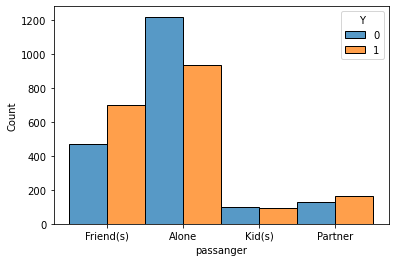

In [234]:
ax = sns.histplot(df_coffee, x="passanger", hue='Y', multiple="dodge")

In [244]:
non_child_passanger = ['Friend(s)', 'Partner']
accepted_non_child_passanger = df_coffee.query("passanger in @non_child_passanger")['Y'].value_counts()[1]
total_non_child_passanger = df_coffee.query("passanger in @non_child_passanger")['Y'].count()
ratio = accepted_non_child_passanger / total_non_child_passanger

print(f"The acceptance ratio of those with non-child passanger is {round(100*ratio, 2)}%")

The acceptance ratio of those with non-child passanger is 59.14%


It appears that those who have non-child passenger in the car are more likely to accept the coupon. but only at a rate of 59.14%.
But if we focus on the more frequent coffee house goers, we get the following graph:

<AxesSubplot:xlabel='passanger', ylabel='Count'>

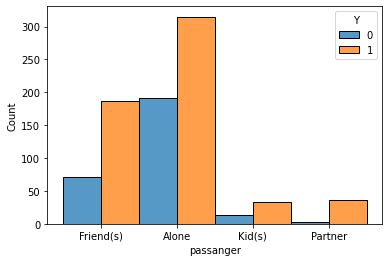

In [80]:
sns.histplot(df_more_frequent, x="passanger", hue='Y', multiple="dodge")

In [249]:
accepted_non_child_passanger = df_more_frequent.query("passanger in @non_child_passanger")['Y'].value_counts()[1]
total_non_child_passanger = df_more_frequent.query("passanger in @non_child_passanger")['Y'].count()
ratio = accepted_non_child_passanger / total_non_child_passanger

print(f"The acceptance ratio of frequent Coffee House goers and with non-child passanger is {round(100*ratio, 2)}%")

The acceptance ratio of frequent Coffee House goers and with non-child passanger is 75.08%


So, it appears that the "passenger" criteria is not very relevant in the population of more frequented the coffee house goers.

<AxesSubplot:xlabel='passanger', ylabel='Count'>

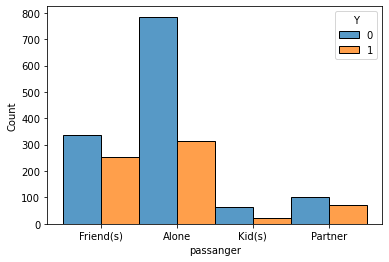

In [83]:
sns.histplot(df_less_frequent, x="passanger", hue='Y', multiple="dodge")

The same is apparent (in the opposite direction) for those who rarely frequent a coffee house

## Effect of Weather on Acceptance

<AxesSubplot:xlabel='weather', ylabel='Count'>

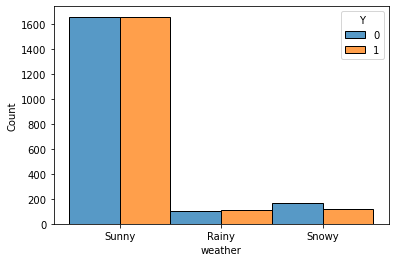

In [87]:
sns.histplot(df_coffee, x="weather", hue='Y', multiple="dodge")

It appears that weather has no effect on the general population (split ~50/50)

<AxesSubplot:xlabel='weather', ylabel='Count'>

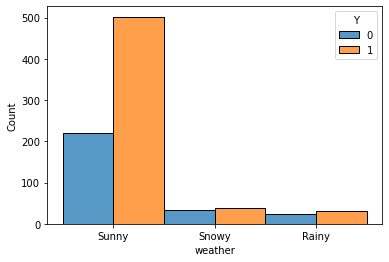

In [90]:
sns.histplot(df_more_frequent, x="weather", hue='Y', multiple="dodge")

However, it appears that if solely focus on those who more often frequent a coffee house, the weather is very relevant, and the the acceptance rate drops significantly with rainy and snowy weather

In [93]:
criteria_bad_weather = ['Rainy', 'Snowy']

df_bad_weather = df_more_frequent.query("weather in @criteria_bad_weather")
df_good_weather = df_more_frequent.query("weather not in @criteria_bad_weather")

total_bad_weather = df_bad_weather['Y'].count()
accepted_bad_weather = df_bad_weather['Y'].value_counts()[1]
ratio_bad_weather = accepted_bad_weather / total_bad_weather

total_gd_weather = df_good_weather['Y'].count()
accepted_gd_weather = df_good_weather['Y'].value_counts()[1]
ratio_gd_weather = accepted_gd_weather / total_gd_weather

print("Those who often frequents a Coffee House accept the coupons at a rate of: ")
print(f"  * {str(100*round(ratio_bad_weather,2))[:5]}% when the weather is bad")
print(f"  * {str(100*round(ratio_gd_weather,2))[:5]}% when the weather is good")

Those who often frequents a Coffee House accept the coupons at a rate of: 
  * 55.00% when the weather is bad
  * 69.0% when the weather is good


## By Expiration

<AxesSubplot:xlabel='expiration', ylabel='Count'>

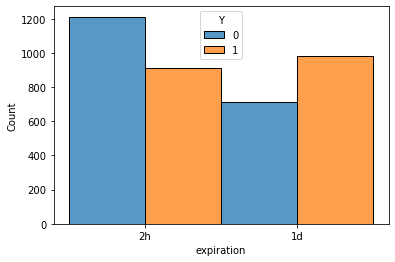

In [96]:
sns.histplot(df_coffee, x="expiration", hue='Y', multiple="dodge")

It appears that, for the general population of those who received coffee coupons, the coupons that expired in 1d were more likely to be accepted than those that expired in 2h.

<AxesSubplot:xlabel='expiration', ylabel='Count'>

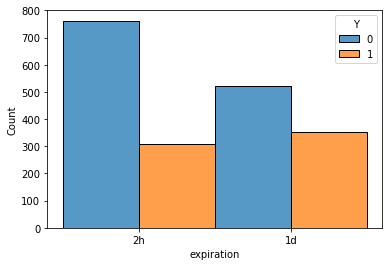

In [100]:
sns.histplot(df_less_frequent, x="expiration", hue='Y', multiple="dodge")

However, those who less frequently went to Coffee houses, were overall less likely to accept a coupon regardless of whether the coupon expired in 2 hours or 1 day.

<AxesSubplot:xlabel='expiration', ylabel='Count'>

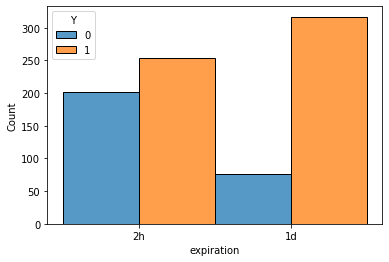

In [102]:
sns.histplot(df_more_frequent, x="expiration", hue='Y', multiple="dodge")

For those who more frequently went to a coffee house, were still more likely to accept a coupon, in general but with a much higher probability if the coupon expired in 1 day.